In [4]:
import sys
import os
# Ajouter le répertoire principal du projet au chemin de recherche des modules
sys.path.append(os.path.abspath('../'))


In [5]:
# type: ignore
import matplotlib.pyplot as plt
from hackathon.helpers.dataset_helpers import load_data
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from hackathon.models.resnet import ResNet
from tensorflow.keras.optimizers import SGD


In [6]:
path = "../dataset"  # Remonte au dossier parent pour accéder au dataset
datadir = os.path.join(path, "african_plums")
print(f"Chemin du dataset : {datadir}")
path = "../dataset"
if not os.path.exists(datadir):
    print(f"Chemin invalide : {datadir}")
else:
    print("[INFO] Dataset trouvé, chargement en cours...")
    print("[INFO] loading datasets...")
    data, labels = load_data(datadir)
    print("[INFO] loaded datasets...")


Chemin du dataset : ../dataset\african_plums
[INFO] Dataset trouvé, chargement en cours...
[INFO] loading datasets...
Traitement du dossier : ../dataset\african_plums\bruised
Chargement de l'image : bruised_plum_1.png
Chargement de l'image : bruised_plum_10.png
Chargement de l'image : bruised_plum_100.png
Chargement de l'image : bruised_plum_101.png
Chargement de l'image : bruised_plum_102.png
Chargement de l'image : bruised_plum_103.png
Chargement de l'image : bruised_plum_104.png
Chargement de l'image : bruised_plum_105.png
Chargement de l'image : bruised_plum_106.png
Chargement de l'image : bruised_plum_107.png
Chargement de l'image : bruised_plum_108.png
Chargement de l'image : bruised_plum_109.png
Chargement de l'image : bruised_plum_11.png
Chargement de l'image : bruised_plum_110.png
Chargement de l'image : bruised_plum_111.png
Chargement de l'image : bruised_plum_112.png
Chargement de l'image : bruised_plum_113.png
Chargement de l'image : bruised_plum_114.png
Chargement de l'ima

In [7]:
data = [cv2.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")
# SUPPRIMER CETTE LIGNE:
# data = np.expand_dims(data, axis=-1)
data /= 255.0


In [ ]:
# convert the labels from integers to vectors
le = LabelBinarizer()
labels = le.fit_transform(labels)
counts = labels.sum(axis=0)
print(f"Shape of labels: {counts}")
counts = labels.sum(axis=0)


Shape of labels: [ 319  162  720  759 1721  826]


In [19]:
# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = {}
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]
# Préparer les données pour l'entraînement
print(classWeight)

{0: np.float64(5.394984326018808), 1: np.float64(10.623456790123457), 2: np.float64(2.390277777777778), 3: np.float64(2.2674571805006587), 4: np.float64(1.0), 5: np.float64(2.083535108958838)}


In [10]:
X, y = np.array(data), np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest",
)


In [12]:
INIT_LR = 1e-1
BS = 128
EPOCHS = 200
# initialize and compile our deep neural network
print("[INFO] compiling model...")
opt = SGD(learning_rate=INIT_LR)
# MODIFIER LA PROFONDEUR À 3:
model = ResNet.build(
    32, 32, 3, len(le.classes_), (3, 3, 3), (64, 64, 128, 256), reg=0.0005
)


[INFO] compiling model...


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) # train the network



In [ ]:

print("[INFO] training network...")
H = model.fit(
    aug.flow(X_train, y_train, batch_size=BS),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS,
    class_weight=classWeight,
    verbose=1,
)



[INFO] training network...


c:\Users\Ultra Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3993 - loss: 3.8169 - val_accuracy: 0.3792 - val_loss: 1.7527
Epoch 2/200
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:10 3s/step - accuracy: 0.4375 - loss: 3.5465

c:\Users\Ultra Tech\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.4375 - loss: 3.5465 - val_accuracy: 0.3836 - val_loss: 1.6969
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.4001 - loss: 3.7239 - val_accuracy: 0.4080 - val_loss: 1.8361
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.4375 - loss: 3.7145 - val_accuracy: 0.5122 - val_loss: 1.5325
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4670 - loss: 3.5169 - val_accuracy: 0.3404 - val_loss: 1.7656
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.4297 - loss: 3.2920 - val_accuracy: 0.5676 - val_loss: 1.4329
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4711 - loss: 3.3870 - val_accuracy: 0.5188 - val_loss: 1.4421
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.4453 - loss: 3.7766 - val_accuracy: 0.1851 - val_loss: 2.0232
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4482 - loss: 3.5103 - val_accuracy: 0.3936 - val_l

In [ ]:
model.save("hackaton_v1.keras")

In [17]:
# Print the training accuracy
accuracy = H.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")


Training accuracy: 0.8671875


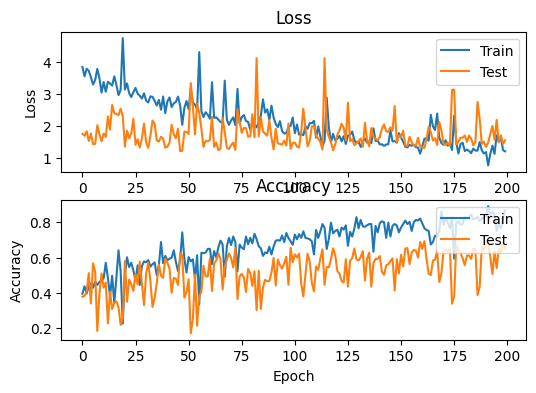

In [18]:
def get_history(history, figsize=(6, 4)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    ax[0].plot(history.history["loss"])
    ax[0].plot(history.history["val_loss"])
    ax[1].plot(history.history["accuracy"])
    ax[1].plot(history.history["val_accuracy"])
    ax[0].set_title("Loss")
    ax[1].set_title("Accuracy")
    ax[0].set_ylabel("Loss")
    ax[1].set_ylabel("Accuracy")
    ax[0].set_xlabel("Epoch")
    ax[1].set_xlabel("Epoch")
    ax[0].legend(["Train", "Test"], loc="upper right")
    ax[1].legend(["Train", "Test"], loc="upper right")
    plt.show()


get_history(H)
